In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
train = pd.read_csv("CelebA-10K-train.csv")
test = pd.read_csv("CelebA-10K-test.csv")
Xtrain = train.iloc[:, 2:]
ytrain = train.iloc[:, 1]
Xtest = test.iloc[:, 2:]
ytest = test.iloc[:, 1]

In [3]:
train.shape

(5000, 514)

In [4]:
test.shape

(5000, 514)

In [5]:
Xtrain.shape

(5000, 512)

In [6]:
ytrain.shape

(5000,)

In [7]:
Xtrain.describe()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.037413,0.054364,0.043947,-0.031372,-0.011638,0.032288,0.012960,0.017858,0.021666,-0.042622,...,0.042937,-0.040441,-0.050408,-0.031527,0.009253,0.001273,0.009321,0.102007,0.065503,-0.067103
std,0.100033,0.216200,0.167179,0.202494,0.144340,0.132907,0.115746,0.147728,0.174645,0.130106,...,0.278551,0.176021,0.176026,0.188322,0.166467,0.147008,0.130686,0.189009,0.193396,0.249110
min,-0.514942,-1.186702,-0.737493,-1.082098,-0.834460,-1.098511,-0.456155,-1.072161,-0.690000,-0.832895,...,-2.437008,-1.026794,-0.769416,-1.544092,-0.843765,-0.738399,-0.630524,-0.818886,-0.956019,-2.282164
25%,-0.099003,-0.080900,-0.064826,-0.156259,-0.102733,-0.048925,-0.059230,-0.075191,-0.087824,-0.122012,...,-0.084379,-0.152477,-0.160560,-0.123698,-0.098871,-0.087407,-0.072627,-0.020463,-0.047178,-0.176619
50%,-0.037723,0.043068,0.039173,-0.028191,-0.005290,0.030197,0.014654,0.015286,0.019242,-0.041374,...,0.058844,-0.043483,-0.053920,-0.019876,0.008019,0.007598,0.005670,0.097187,0.068358,-0.059140
75%,0.027501,0.175274,0.147130,0.098058,0.080207,0.108398,0.086755,0.106692,0.132385,0.040344,...,0.200396,0.071910,0.059765,0.080327,0.111976,0.096453,0.088554,0.218035,0.182472,0.068277
max,0.468731,1.460243,0.755117,0.737792,0.508091,0.750629,0.552011,0.916735,0.962201,0.519902,...,1.375132,0.953129,0.800991,0.820405,1.140661,0.606702,0.565881,1.210247,1.122297,0.873056


In [8]:
ytrain.describe()

count       5000
unique         2
top       female
freq        2909
Name: Gender, dtype: object

In [9]:
Xtrain.columns.values

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144

In [10]:
all(Xtrain.dtypes=='float64') #todas las columnas son de tipo float64

True

In [11]:
ytrain.dtypes

dtype('O')

In [12]:
Xtrain.isnull().sum().sum()

0

In [13]:
ytrain.isnull().sum().sum()

0

In [14]:
Xtest.isnull().sum().sum()

0

In [15]:
ytest.isnull().sum().sum()

0

In [16]:
lr = LogisticRegression().fit(Xtrain, ytrain)
accuracy_score(ytest, lr.predict(Xtest))

0.9126

In [17]:
svm = SVC().fit(Xtrain, ytrain)
accuracy_score(ytest, svm.predict(Xtest))

0.9462

In [23]:
pca = PCA().fit(Xtrain)
pca = pd.DataFrame({"varianza":pca.explained_variance_, "ratio de varianza":pca.explained_variance_ratio_, "ratio de varianza acumulado": np.cumsum(pca.explained_variance_ratio_)})
pca[pca["ratio de varianza acumulado"]<=0.9]

,varianza,ratio de varianza,ratio de varianza acumulado
0,1.968519,0.124794,0.124794
1,0.341133,0.021626,0.146420
2,0.250499,0.015880,0.162300
3,0.231786,0.014694,0.176994
4,0.223143,0.014146,0.191140
...,...,...,...
106,0.053319,0.003380,0.884543
107,0.052773,0.003346,0.887889
108,0.051691,0.003277,0.891166
109,0.050698,0.003214,0.894380


In [24]:
pca[pca["ratio de varianza acumulado"]<=0.95]

,varianza,ratio de varianza,ratio de varianza acumulado
0,1.968519,0.124794,0.124794
1,0.341133,0.021626,0.146420
2,0.250499,0.015880,0.162300
3,0.231786,0.014694,0.176994
4,0.223143,0.014146,0.191140
...,...,...,...
125,0.040277,0.002553,0.939978
126,0.039940,0.002532,0.942510
127,0.039025,0.002474,0.944984
128,0.038212,0.002422,0.947406


In [25]:
pca[pca["ratio de varianza acumulado"]<=0.99]

,varianza,ratio de varianza,ratio de varianza acumulado
0,1.968519,0.124794,0.124794
1,0.341133,0.021626,0.146420
2,0.250499,0.015880,0.162300
3,0.231786,0.014694,0.176994
4,0.223143,0.014146,0.191140
...,...,...,...
147,0.023088,0.001464,0.984441
148,0.022299,0.001414,0.985855
149,0.021428,0.001358,0.987213
150,0.020824,0.001320,0.988534


In [28]:
pca90 = pd.DataFrame(PCA(n_components=111).fit_transform(Xtrain))
pca90

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,-0.142186,-0.464908,-0.785370,0.369131,0.398373,0.042681,0.208090,-0.164945,0.151272,-0.072144,...,-0.082061,-0.087860,0.230235,0.009548,-0.114241,0.058462,0.058824,-0.319386,0.255798,-0.003072
1,-0.303379,-0.081972,0.574312,0.669781,-0.906389,-0.412448,-0.980132,-0.732072,-0.020445,-0.758294,...,-0.220606,-0.216636,-0.234958,-0.035809,-0.097872,0.297167,-0.013589,0.176849,-0.056348,-0.111375
2,-0.385026,0.584064,-0.885512,-0.256960,-0.696711,-0.850039,-0.894092,-1.011445,0.056646,-0.118771,...,0.070244,0.121418,0.209638,0.156471,0.352762,0.205439,0.016549,-0.208214,-0.211168,0.294363
3,-0.042775,0.025324,0.516035,-0.218175,-0.250903,0.021909,-0.194916,0.016620,0.649710,-0.064594,...,0.586394,-0.058765,-0.227010,-0.064923,-0.012194,0.205111,-0.060557,0.177751,-0.081571,-0.183650
4,-0.334595,-0.358782,-0.298289,0.279233,0.279877,0.529955,-0.119400,-0.248930,-0.119946,0.075633,...,-0.037216,0.230356,0.021481,-0.152947,-0.114332,0.061185,-0.282084,-0.074014,-0.062345,0.341878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.580568,1.526307,0.295320,0.000321,-0.238220,1.427693,-0.277935,-0.121410,-1.147649,-0.311441,...,-0.085226,-0.167842,-0.194592,-0.089746,0.198657,-0.232173,-0.191025,0.170085,0.314279,0.221987
4996,-0.064355,0.496220,0.451786,-0.029660,0.676487,-0.410920,0.763996,0.030736,0.558400,-0.122654,...,0.142025,0.160278,0.073098,-0.458050,0.136252,0.054102,0.194560,-0.197405,0.264752,-0.056472
4997,-0.340536,0.014560,-0.295994,-0.191576,-0.355963,-0.343595,-0.151013,0.057068,0.540293,0.184410,...,0.353524,-0.197552,0.112792,-0.098163,0.055693,0.531516,-0.228551,0.288408,-0.063457,0.484270
4998,-0.052108,-0.513793,0.482840,-0.744602,-0.229222,-0.252160,0.006585,-0.150606,-0.106053,-0.031853,...,-0.023155,-0.637060,-0.223879,0.048874,0.334712,-0.482602,0.240853,0.388350,0.144055,0.070725


In [31]:
pca90.shape

(5000, 111)

In [29]:
pca95 = pd.DataFrame(PCA(n_components=130).fit_transform(Xtrain))
pca95

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,-0.142186,-0.464971,-0.785498,0.369494,0.398394,0.042321,0.208516,-0.165299,0.151225,-0.071793,...,0.033712,-0.116078,0.054830,-0.050479,0.013209,-0.172032,-0.074430,0.024625,0.230638,-0.017872
1,-0.303379,-0.082046,0.574190,0.670068,-0.906359,-0.412787,-0.980371,-0.732437,-0.020171,-0.757848,...,0.141292,0.010549,-0.131427,-0.108704,-0.114642,-0.022470,-0.156249,0.171882,0.015112,0.093415
2,-0.385026,0.584101,-0.885475,-0.257748,-0.697156,-0.849387,-0.894932,-1.010854,0.056799,-0.119788,...,-0.093331,0.046833,0.056839,0.175224,0.219003,-0.155459,-0.169705,0.243163,-0.000678,-0.037592
3,-0.042775,0.025243,0.515775,-0.217870,-0.251175,0.021768,-0.195456,0.016935,0.649763,-0.063892,...,0.037555,-0.340791,-0.199343,-0.214385,0.023833,0.032990,-0.091408,-0.021061,0.119081,0.206778
4,-0.334595,-0.358771,-0.298232,0.279383,0.279850,0.530165,-0.118960,-0.248858,-0.120184,0.076036,...,0.387888,0.064176,0.044418,-0.110225,-0.219812,0.116091,0.184064,-0.016578,0.034792,-0.150819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.580568,1.526238,0.295020,0.000210,-0.238415,1.427672,-0.278300,-0.121551,-1.147352,-0.311711,...,-0.049459,-0.223313,-0.193517,-0.103520,0.050095,-0.078153,-0.109938,-0.171100,-0.054867,-0.126274
4996,-0.064355,0.496254,0.451790,-0.029808,0.676362,-0.410571,0.763930,0.031217,0.559018,-0.122945,...,-0.144902,0.212316,0.042805,0.140220,0.289681,-0.003293,0.043334,0.105098,-0.104488,0.352813
4997,-0.340536,0.014630,-0.295858,-0.192065,-0.355593,-0.343654,-0.151206,0.057541,0.540639,0.184042,...,0.074211,-0.009390,-0.041689,0.176385,0.123909,0.053895,-0.103491,-0.098732,-0.185551,0.025646
4998,-0.052108,-0.513719,0.482833,-0.744798,-0.229503,-0.251871,0.006633,-0.150184,-0.106151,-0.032288,...,-0.288973,0.025582,0.232897,-0.176104,0.172919,0.203275,0.054133,0.036898,0.064894,-0.344317


In [32]:
pca95.shape

(5000, 130)

In [30]:
pca99 = pd.DataFrame(PCA(n_components=152).fit_transform(Xtrain))
pca99

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,-0.142186,-0.464970,-0.785477,0.369500,0.398405,0.042312,0.208507,-0.165289,0.151232,-0.071841,...,0.101383,-0.042797,0.063543,-0.145162,-0.065033,-0.040443,0.081405,0.077302,-0.124665,0.110390
1,-0.303379,-0.082046,0.574185,0.670031,-0.906395,-0.412795,-0.980356,-0.732406,-0.020184,-0.757798,...,0.079088,0.115089,-0.110615,-0.093637,0.034217,0.151864,-0.043424,-0.022398,0.043285,-0.026634
2,-0.385026,0.584099,-0.885511,-0.257724,-0.697137,-0.849368,-0.894984,-1.010878,0.056797,-0.119780,...,-0.146639,0.086696,-0.104566,-0.104383,0.022672,0.042742,0.074896,-0.069894,-0.012578,-0.209519
3,-0.042775,0.025238,0.515724,-0.217827,-0.251142,0.021857,-0.195460,0.016941,0.649776,-0.063897,...,0.073949,0.128278,0.062717,0.015642,0.221587,0.076470,-0.044759,-0.094880,0.071205,0.004588
4,-0.334595,-0.358769,-0.298251,0.279404,0.279946,0.530170,-0.118981,-0.248829,-0.120209,0.075998,...,0.267654,-0.063944,0.053969,0.170836,-0.162058,-0.071855,0.197300,0.014968,-0.105502,0.130282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.580568,1.526237,0.294951,0.000234,-0.238365,1.427749,-0.278316,-0.121507,-1.147362,-0.311691,...,0.190066,0.197204,0.202086,0.041447,0.088486,-0.146095,0.004964,0.032283,0.188380,-0.129221
4996,-0.064355,0.496254,0.451745,-0.029784,0.676428,-0.410544,0.763918,0.031209,0.558968,-0.122951,...,-0.009414,0.029373,-0.033328,0.183599,0.078151,0.109670,-0.184694,-0.134593,0.028193,-0.019648
4997,-0.340536,0.014625,-0.295858,-0.192099,-0.355703,-0.343611,-0.151157,0.057571,0.540691,0.184101,...,-0.037662,-0.065670,-0.023237,-0.075545,0.125027,0.041703,-0.056386,0.089315,-0.210392,-0.203483
4998,-0.052108,-0.513715,0.482798,-0.744826,-0.229494,-0.251857,0.006613,-0.150116,-0.106157,-0.032230,...,0.256268,0.113819,-0.115340,-0.056928,-0.027501,-0.067255,0.018505,0.202298,0.114981,-0.051770


In [33]:
pca99.shape

(5000, 152)

In [40]:
pca[pca["ratio de varianza"]<0.001]

,varianza,ratio de varianza,ratio de varianza acumulado
154,0.014124,8.953638e-04,0.992904
155,0.013448,8.525185e-04,0.993756
156,0.012459,7.898589e-04,0.994546
157,0.011877,7.529111e-04,0.995299
158,0.010811,6.853417e-04,0.995985
...,...,...,...
507,0.000001,9.018961e-08,1.000000
508,0.000001,8.771449e-08,1.000000
509,0.000001,8.708736e-08,1.000000
510,0.000001,8.578604e-08,1.000000


Text(0.5, 1.0, 'Varianza acumulada de las primeras 210 componentes principales')

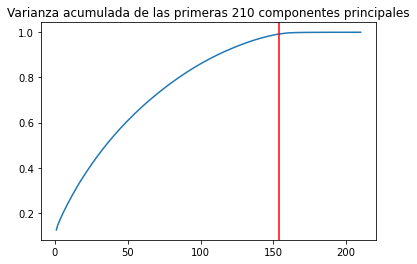

In [43]:
plt.plot(list(range(1, 211)), pca["ratio de varianza acumulado"][:210])
plt.axvline(x=154, color="red")
plt.title("Varianza acumulada de las primeras 210 componentes principales")

In [64]:
pca95 = PCA(n_components=130)
pca95.fit(Xtrain)
pca95_test = pd.DataFrame(pca95.transform(Xtest))
pca95 = pd.DataFrame(pca95.transform(Xtrain))
lr = LogisticRegression().fit(pca95, ytrain)
accuracy_score(ytest, lr.predict(pca95_test))

0.8914

Text(0, 0.5, 'Segunda variable del dataset original')

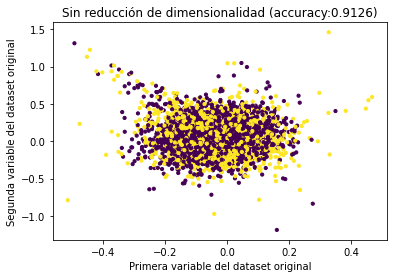

In [84]:
encoder = preprocessing.LabelEncoder()
encoder.fit(train.iloc[:,1])
labels = encoder.transform(train.iloc[:,1])
plt.scatter(Xtrain.iloc[:, 0], Xtrain.iloc[:, 1], c=labels, s=10)
plt.title("Sin reducción de dimensionalidad (accuracy:0.9126)")
plt.xlabel("Primera variable del dataset original")
plt.ylabel("Segunda variable del dataset original")

Text(0, 0.5, 'PC2')

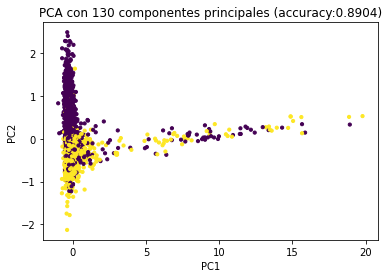

In [83]:
plt.scatter(pca95.iloc[:, 0], pca95.iloc[:, 1], c=labels, s=10)
plt.title("PCA con 130 componentes principales (accuracy:0.8904)")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [79]:
LDA = LinearDiscriminantAnalysis().fit(Xtrain, ytrain)
lda = LDA.transform(Xtrain)
lda

array([[-1.55365156],
       [ 0.87860683],
       [-2.67430824],
       ...,
       [-3.11536062],
       [ 3.5821358 ],
       [-2.36301841]])

In [81]:
accuracy_score(ytest, LDA.predict(Xtest))

0.9566

Text(0.5, 1.0, 'Resultado de Logistic Regression tras LDA (1 dimensión) (accuracy:0.9566)')

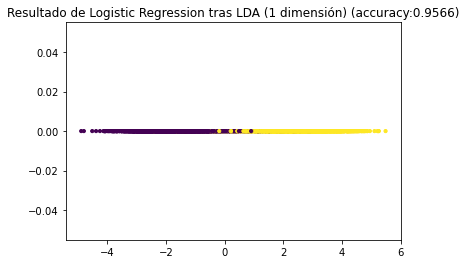

In [82]:
plt.scatter(lda, np.zeros(len(lda)), c=labels, s=10)
plt.title("Resultado de Logistic Regression tras LDA (1 dimensión) (accuracy:0.9566)")

In [85]:
SVM = SVC().fit(Xtrain, ytrain)
accuracy_score(ytest, SVM.predict(Xtest))

0.9462